In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud

In [2]:
airbnb = pd.read_csv('./Airbnb_Open_Data.csv', low_memory = False);

In [3]:
airbnb.drop_duplicates()
airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
airbnb.shape

(102599, 26)

In [5]:
airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
airbnb["neighbourhood group"].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [7]:
airbnb['neighbourhood group'].replace(['manhatan','brookln'],['Manhattan','Brooklyn'],inplace=True)

In [8]:
neighbourhood_groups = airbnb["neighbourhood group"].value_counts()
neighbourhood_groups

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: neighbourhood group, dtype: int64

In [9]:
# airbnb['price'] = airbnb['price'][1:].astype(int)
df = airbnb.loc[~airbnb.price.isnull()]
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(int)

<ipython-input-9-4876a5c31c3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(int)


In [10]:

price_Manhattan= np.array(df.loc[df["neighbourhood group"]== "Manhattan"]["price"])
price_Brooklyn = np.array(df.loc[df["neighbourhood group"]== "Brooklyn"]["price"])
price_Queens = np.array(df.loc[df["neighbourhood group"]== "Queens"]["price"])
price_Bronx = np.array(df.loc[df["neighbourhood group"]== "Bronx"]["price"])
price_Staten = np.array(df.loc[df["neighbourhood group"]== "Staten Island"]["price"])
price_neigh = [price_Manhattan, price_Brooklyn, price_Queens, price_Bronx, price_Staten]
price_Staten.mean()

624.4905462184873

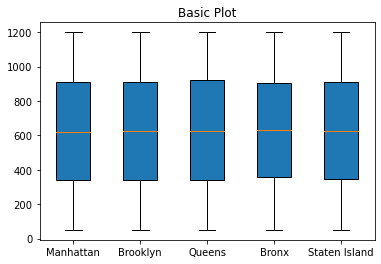

In [11]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(price_neigh,patch_artist=True,labels=['Manhattan','Brooklyn', 'Queens', 'Bronx', 'Staten Island'])
# plt.boxplot(price_Manhattan,patch_artist=True,labels=['course1'])
plt.show()

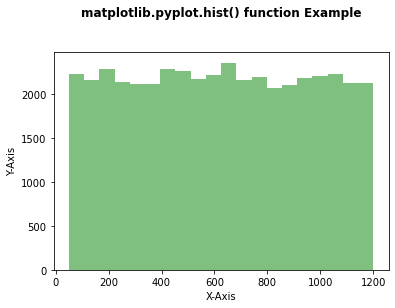

In [12]:

n, bins, patches = plt.hist(df.loc[df["neighbourhood group"]== "Manhattan"]["price"], 20, 
                            # density = 1, 
                            color ='green',
                            alpha = 0.5)

  
# plt.plot(bins, y, '--', color ='black')
  
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
  
plt.title('matplotlib.pyplot.hist() function Example\n\n',
          fontweight ="bold")
  
plt.show()

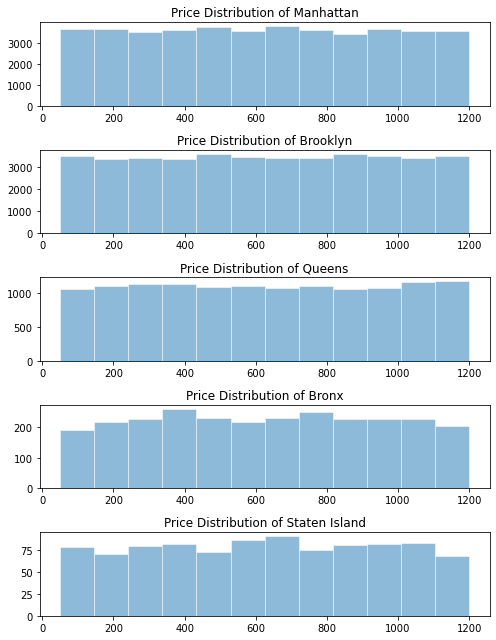

In [13]:
fig,ax = plt.subplots(5, figsize = (7,9));
ax =ax.flatten()
columns = ['Manhattan','Brooklyn', 'Queens', 'Bronx', 'Staten Island']
for i in range(len(columns)):
    ax[i].hist(price_neigh[i], 12, edgecolor="white", alpha = 0.5)
    ax[i].set_title("Price Distribution of " + columns[i])
fig.tight_layout()

In [14]:
a = "123456"
a[:3:-1]

'65'

In [15]:
# df['service fee'] = 0 airbnb.loc[df['service fee'].isnull()]
df['total price'] = df['price'] + df['service fee'].fillna(0).replace('[\$,]', '', regex=True).astype(int)

<ipython-input-15-fbed6099b8e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total price'] = df['price'] + df['service fee'].fillna(0).replace('[\$,]', '', regex=True).astype(int)


In [16]:
# df['marker'] = df['neighbourhood group'].replace(['Manhattan','Brooklyn', 'Queens', 'Bronx', 'Staten Island'],["o", "v", "s", "p", "x"],inplace=True)
# df['neighbourhood group']

In [17]:
ny = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['lat'], df['long']))

/Users/yuxi/miniconda3/envs/IV/lib/python3.8/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot:xlabel='lat', ylabel='long'>

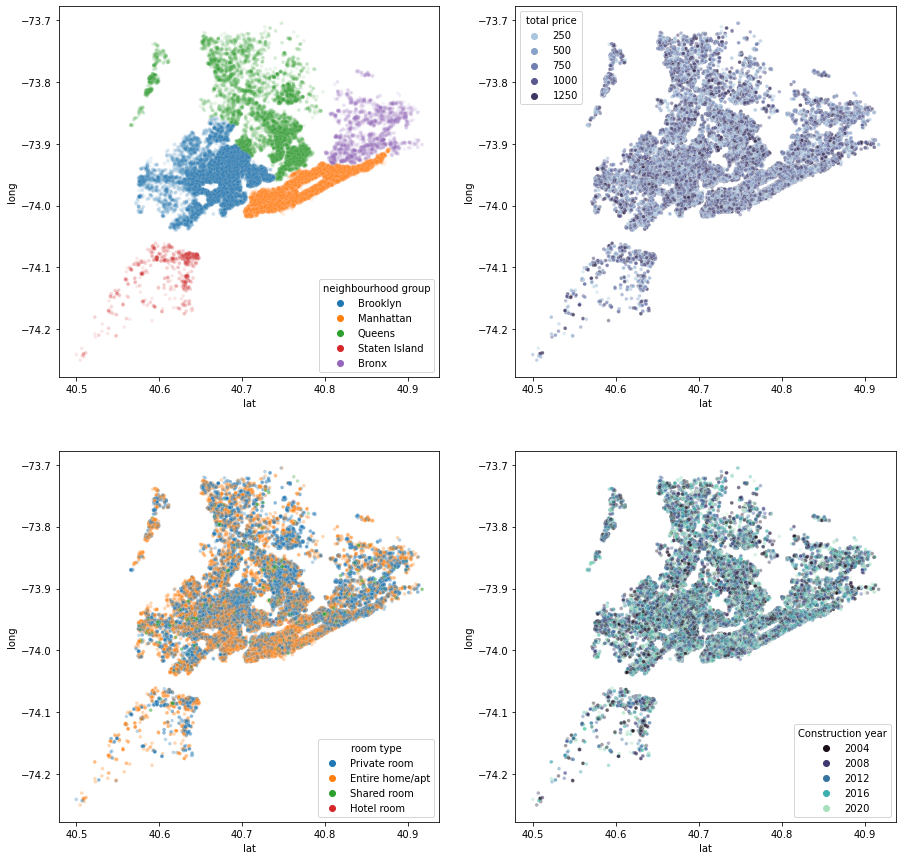

In [23]:
fig1, ax1 = plt.subplots(2,2, figsize=(15,15))
# sns.set(rc={'figure.figsize':(11.7,11.7)})
sns.scatterplot(ax=ax1[0][0],data=ny, x="lat", y="long", hue='neighbourhood group', alpha  = 0.1, s=13)
sns.scatterplot(ax=ax1[0][1],data=ny, x="lat", y="long", hue='total price',palette="ch:s=.25,rot=-.25",alpha  = 0.5, s=13)
sns.scatterplot(ax=ax1[1][0],data=ny, x="lat", y="long", hue='room type', alpha  = 0.3, s=13)
sns.scatterplot(ax=ax1[1][1],data=ny, x="lat", y="long", hue='Construction year', palette="mako",alpha  = 0.4, s=13)


In [19]:
nyname = ny.loc[~ny['NAME'].isnull()]
all_words = ' '.join([text for text in nyname['NAME']])
# ny.loc[~ny['NAME'].isnull()]
# Create a wordcloud object
wordcloud = WordCloud(background_color='white').generate(all_words)
wordcloud

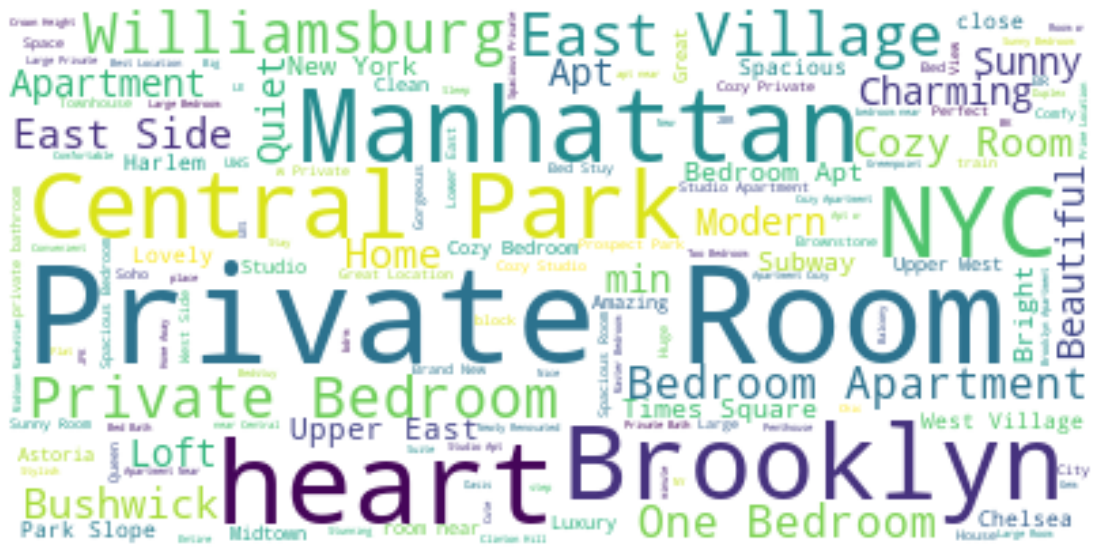

In [20]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()